In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/persian-fake-corona-news/CoronaALL.csv',sep='\t')
df.head()

,Unnamed: 0,Text,Class
0,0,من غیر منخرشه انا وهنادی بمکان فیه کرونا وهم ی...,2.0
1,1,تا خواستم کار رو شروع کنم و برم خرید کرونا اوم...,1.0
2,2,ایران تغییر رژیم با ویروس کرونا آندریوف کو...,0.0
3,3,هههههههههههه یلوناس خلو کرونا یروح بعدین نتفاهم,2.0
4,4,موج ضد آخوند توی تشییع جنازه های کرونا زده شکل...,0.0


In [3]:
df = df.drop(columns=['Unnamed: 0'])
df = df[df["Class"]!=2]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8808 entries, 1 to 12860
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Text    8808 non-null   object 
 1   Class   8805 non-null   float64
dtypes: float64(1), object(1)
memory usage: 206.4+ KB


In [4]:
df = df.dropna()
df.describe()

,Class
count,8805.000000
mean,0.446110
std,0.497116
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


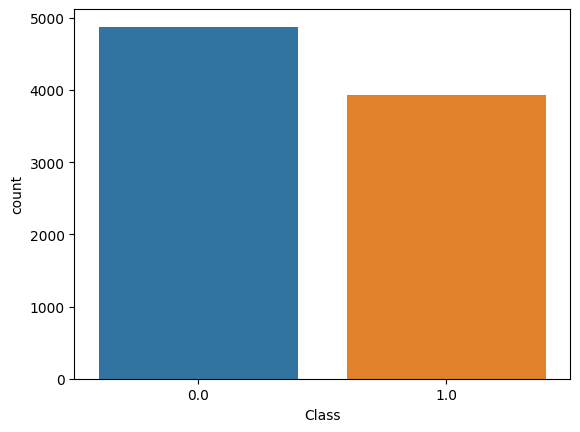

In [5]:
sns.countplot(data = df, x = df['Class']);

# Credit:

https://www.kaggle.com/code/omidsakaki1370/fake-news-ml-models